In [2]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pandas as pd
from process_helper import plot_volcano, plot_donors_scatter, generate_screen_analysis_table

In [5]:
screen_analysis_table = generate_screen_analysis_table()

['data_out/CRISPRa.TNFa.CD4.supplemental.gene_summary.txt', 'data_out/CRISPRa.IFNG.CD8.orig.gene_summary.txt']
['data_out/CRISPRa.TNFa.CD4.supplemental.sgrna_summary.txt', 'data_out/CRISPRa.IFNG.CD8.orig.sgrna_summary.txt']
Both pos and neg fdr minor than 0.05
[1, 1]


In [6]:
screen_analysis_table

,Gene,Screen,Donor1_LFC,Donor2_LFC,LFC,zscore,FDR,Hit,Hit_Type,Cytokine
0,A1BG,CRISPRa,0.453000,0.471505,0.471510,2.104959,0.066411,False,NA,IFNG
1,A1BG,CRISPRa,0.266305,-0.087442,0.190800,0.372649,0.965390,False,NA,TNFa
2,A1CF,CRISPRa,0.029470,0.046243,0.046242,0.491721,0.915526,False,NA,IFNG
3,A1CF,CRISPRa,0.223835,0.189680,0.223830,0.493771,1.000000,False,NA,TNFa
4,A2M,CRISPRa,0.272135,-0.024780,0.238580,1.221348,0.660126,False,NA,IFNG
...,...,...,...,...,...,...,...,...,...,...
37857,ZYX,CRISPRa,-0.304185,-0.710105,-0.576270,-2.440234,0.058389,False,NA,TNFa
37858,ZZEF1,CRISPRa,-0.358235,0.271950,-0.016452,0.253894,0.847567,False,NA,IFNG
37859,ZZEF1,CRISPRa,0.519295,0.358665,0.451590,1.328978,0.215414,False,NA,TNFa
37860,ZZZ3,CRISPRa,-0.219016,0.230555,0.063556,0.557401,0.864937,False,NA,IFNG


In [9]:
cytokine = 'TNFa'
screen = 'CRISPRa'
cell_type = 'CD4'

# screen_analysis_table = pd.read_csv(f'{cytokine}_screen_analysis_table.csv', index_col=False).iloc[:, 1:]
screen_analysis_table = pd.read_csv('data_out/screen_analysis_table.csv', index_col=False).iloc[:, 1:]
screen_analysis_table = screen_analysis_table[
    (screen_analysis_table['Screen'] == screen) & 
    (screen_analysis_table['Cytokine'] == cytokine) 
].set_index('Gene')

In [10]:
screen_analysis_table['Hit_Type'].value_counts()

Hit_Type
Negative Regulator    313
Positive Regulator    173
Name: count, dtype: int64

# TNFa Positive Regulator sorted by LFC

In [11]:
screen_analysis_table[screen_analysis_table['Hit_Type'] == 'Positive Regulator'].sort_values('LFC', ascending=False).head(50)

,Screen,Donor1_LFC,Donor2_LFC,LFC,zscore,FDR,Hit,Hit_Type,Cytokine
Gene,,,,,,,,,
CD28,CRISPRa,2.951000,3.283600,2.95100,10.494437,0.000146,True,Positive Regulator,TNFa
VAV1,CRISPRa,2.794650,3.141850,2.85250,10.133232,0.000146,True,Positive Regulator,TNFa
CNR2,CRISPRa,2.410700,1.824950,2.14690,7.545763,0.000146,True,Positive Regulator,TNFa
OTUD7B,CRISPRa,1.264495,2.237250,1.92200,6.721043,0.000146,True,Positive Regulator,TNFa
DEF6,CRISPRa,1.594400,2.082950,1.86320,6.505421,0.000146,True,Positive Regulator,TNFa
DEPDC7,CRISPRa,1.914250,1.328050,1.59070,5.506150,0.000146,True,Positive Regulator,TNFa
FOXD2,CRISPRa,1.862250,1.166350,1.54120,5.324631,0.000146,True,Positive Regulator,TNFa
HSFX2,CRISPRa,1.585000,1.350800,1.46790,5.055837,0.001036,True,Positive Regulator,TNFa
LCP2,CRISPRa,1.679200,1.397350,1.39740,4.797310,0.000146,True,Positive Regulator,TNFa


# TNFa Negative Regulator sorted by LFC

In [12]:
screen_analysis_table[screen_analysis_table['Hit_Type'] == 'Negative Regulator'].sort_values('LFC', ascending=True).head(50)

,Screen,Donor1_LFC,Donor2_LFC,LFC,zscore,FDR,Hit,Hit_Type,Cytokine
Gene,,,,,,,,,
MAP4K1,CRISPRa,-2.977800,-3.121200,-2.9857,-11.275732,0.000087,True,Negative Regulator,TNFa
LAT2,CRISPRa,-2.719400,-3.354000,-2.7353,-10.357503,0.000087,True,Negative Regulator,TNFa
LYN,CRISPRa,-1.723000,-2.746550,-2.6801,-10.155082,0.000087,True,Negative Regulator,TNFa
GRAP,CRISPRa,-2.205550,-2.730950,-2.3893,-9.088704,0.000087,True,Negative Regulator,TNFa
ARHGDIB,CRISPRa,-2.112650,-1.882950,-2.1127,-8.074398,0.000087,True,Negative Regulator,TNFa
LCK,CRISPRa,-1.240155,-2.984700,-2.1126,-8.074032,0.000087,True,Negative Regulator,TNFa
PITX1,CRISPRa,-2.092750,-2.133500,-2.0928,-8.001424,0.000087,True,Negative Regulator,TNFa
CD244,CRISPRa,-1.697950,-2.703100,-2.0793,-7.951919,0.000087,True,Negative Regulator,TNFa
SLA2,CRISPRa,-1.966850,-2.029900,-2.0299,-7.770767,0.000087,True,Negative Regulator,TNFa


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


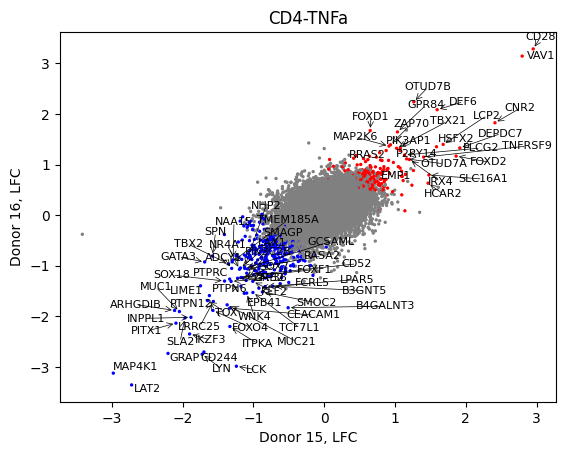

In [15]:
top_n = 10
top_10_low = pd.read_csv(f'data_out/{screen}.{cytokine}.{cell_type}.supplemental.gene.low.txt', sep='\t')['group_id'][:top_n].to_list()
top_10_high = pd.read_csv(f'data_out/{screen}.{cytokine}.{cell_type}.supplemental.gene.high.txt', sep='\t')['group_id'][:top_n].to_list()
fig_1 = plot_donors_scatter(
    screen_analysis_table,
    'Donor 15, LFC',
    'Donor 16, LFC',
    f'{cell_type}-{cytokine}'
);



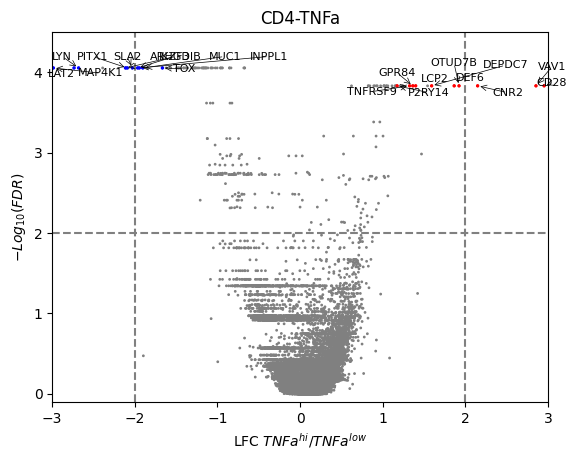

In [16]:

fig_2 = plot_volcano(
    screen_analysis_table,
    x_label='LFC ' + '$'+f'{cytokine}'+'^{hi}/TNFa^{low}$',
    y_label='$-Log_{10}(FDR)$',
    plot_title=f'{cell_type}-{cytokine}',
    eps=1e-6,
    top_10_low=top_10_low,
    top_10_high=top_10_high,
)